# Problem 2(a) - MNIST Data classification using PyTorch

In [1]:
import torch
import torchvision as thv
import numpy as np
from numpy import linalg as la
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn, optim
import matplotlib.pyplot as plt

## Loading Data

In [2]:
trans = transforms.Compose([transforms.ToTensor()])

train_data = thv.datasets.MNIST('./data/training.pt', download=True , train=True, transform=trans) 
val_data = thv.datasets.MNIST('./data/test.pt', download=True, train=False, transform=trans) 
print(train_data.data.shape, len(val_data.targets))

torch.Size([60000, 28, 28]) 10000


In [3]:
train_rand_indices = np.random.choice(np.arange(int(train_data.data.shape[0]/2)), int(train_data.data.shape[0]/2), replace=False)
test_rand_indices = np.random.choice(np.arange(int(val_data.data.shape[0]/2)), int(val_data.data.shape[0]/2), replace=False)

train_data_size = train_rand_indices.shape[0]
test_data_size = test_rand_indices.shape[0]

sample_train_data = torch.utils.data.Subset(train_data, train_rand_indices)
sample_test_data = torch.utils.data.Subset(val_data, test_rand_indices)


train_loader = torch.utils.data.DataLoader(
                 dataset=sample_train_data,
                 batch_size=32,
                 shuffle=True)

test_loader = torch.utils.data.DataLoader(
                dataset=sample_test_data,
                batch_size=32,
                shuffle=True)

## Defining Model

In [4]:
def mnist_model(input_size, output_size):

    modules = []
    
    modules.append(nn.Linear(input_size, output_size))
    modules.append(nn.Dropout(p=0.5))
    modules.append(nn.ReLU())
    modules.append(nn.LogSoftmax(dim=1))
    
    
    model = nn.Sequential(*modules)
    
    return model

## Defining Model Configuration

In [5]:
net = mnist_model(784, 10)

param = [x for x in net.parameters()]

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam([{'params': param, 'lr': 0.0001}])

## Training Network and computing validation loss

In [6]:
num_epoch = 120
batch_size = 32

train_loss_per_epoch = []
train_loss_per_batch = []
train_accuracy_per_epoch = []
train_accuracy_per_batch = []
train_error_per_epoch = []


test_loss_per_epoch = []
test_loss_per_batch = []
test_accuracy_per_epoch = []
test_accuracy_per_batch =[]
test_error_per_epoch = []

for itr in range(num_epoch):
    train_epoch_loss = 0
    train_accuracy = 0
    test_epoch_loss = 0
    test_accuracy = 0
    
    net.train()
    for batch_id, (img, label) in enumerate(train_loader):
        _train_accuracy_per_batch=0
        _train_epoch_loss=0
        img = img.view(-1, 784)
        optimizer.zero_grad()
      
        output = net(img)
        loss = criterion(output, label)
                
        _, pred_label = torch.max(output.data,1)
        
        train_accuracy += torch.sum(pred_label==label)
        _train_accuracy_per_batch =  torch.sum(pred_label==label)
        
        loss.backward()
        optimizer.step()
        
        train_epoch_loss += loss.item()
        _train_epoch_loss = loss.item()
        
        train_loss_per_batch.append(_train_epoch_loss/batch_size)
        train_accuracy_per_batch.append(_train_accuracy_per_batch/batch_size)
        
    
    train_epoch_loss = train_epoch_loss/train_data_size
    train_loss_per_epoch.append(train_epoch_loss)
    
    train_accuracy = train_accuracy/train_data_size
    train_accuracy_per_epoch.append(train_accuracy) 
    train_error_per_epoch.append(1-train_accuracy)
    
    net.eval()
    for batch_id, (img, label) in enumerate(test_loader):
        _test_accuracy_per_batch=0
        _test_epoch_loss=0
        
        img = img.view(-1, 784)
        predict = net(img)
        
        test_loss = criterion(predict, label)
        
        _, pred_label = torch.max(predict.data, 1)
        
        test_accuracy += torch.sum(pred_label==label)
        _test_accuracy_per_batch = torch.sum(pred_label==label)
        
        test_epoch_loss += test_loss.item()
        _test_epoch_loss = test_loss.item()
        
        test_loss_per_batch.append(_test_epoch_loss/batch_size)
        test_accuracy_per_batch.append(_test_accuracy_per_batch/batch_size)
        
    test_epoch_loss = test_epoch_loss/test_data_size
    test_loss_per_epoch.append(test_epoch_loss)
    
    test_accuracy = test_accuracy/test_data_size
    test_accuracy_per_epoch.append(test_accuracy)
    test_error_per_epoch.append(1-test_accuracy)

Text(0, 0.5, 'Train Accuracy')

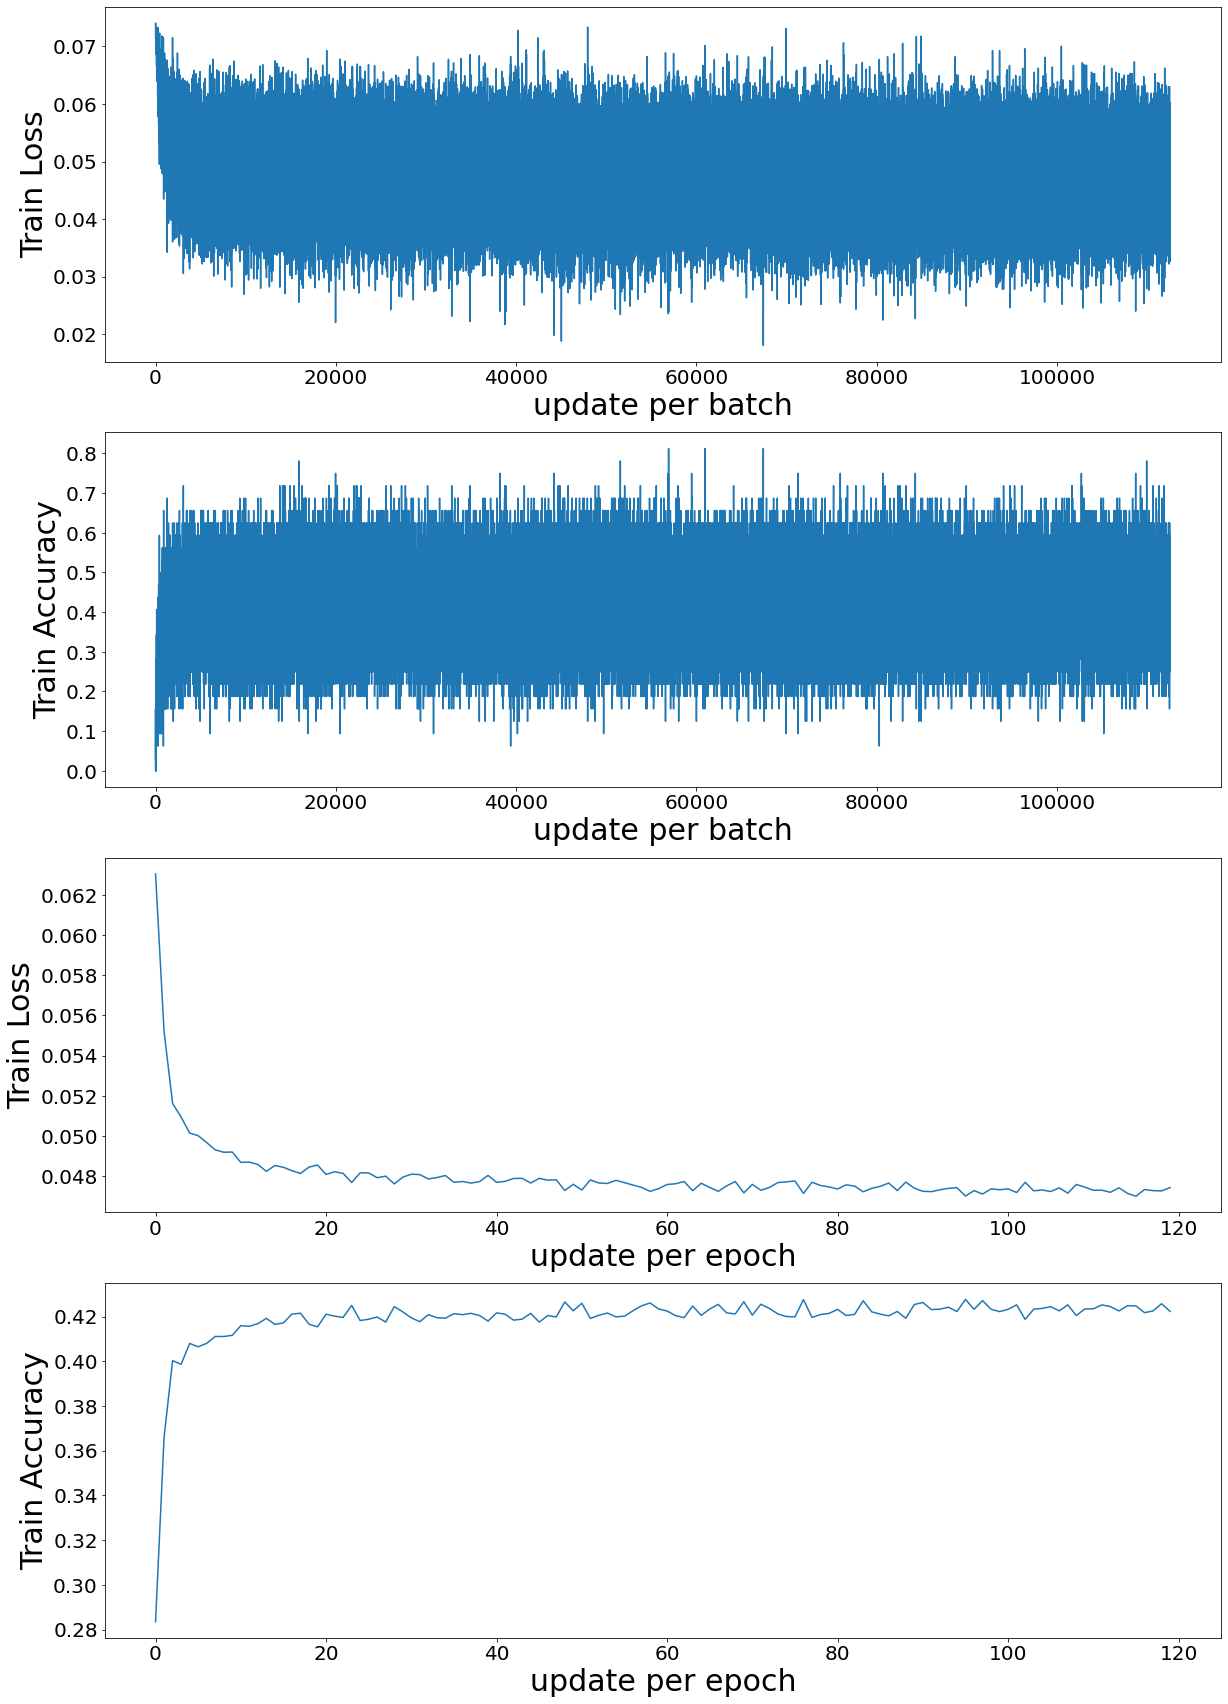

In [7]:
fig1 = plt.figure(figsize=(20,30))

plt.subplot(4,1,1)
plt.plot(train_loss_per_batch)
plt.xlabel('update per batch', fontsize=30)
plt.ylabel('Train Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,2)
plt.plot(train_accuracy_per_batch)
plt.xlabel('update per batch', fontsize=30)
plt.ylabel('Train Accuracy', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,3)
plt.plot(train_loss_per_epoch)
plt.xlabel('update per epoch', fontsize=30)
plt.ylabel('Train Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,4)
plt.plot(train_accuracy_per_epoch)
plt.xlabel('update per epoch', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Train Accuracy', fontsize=30)

Text(0, 0.5, 'Test Accuracy')

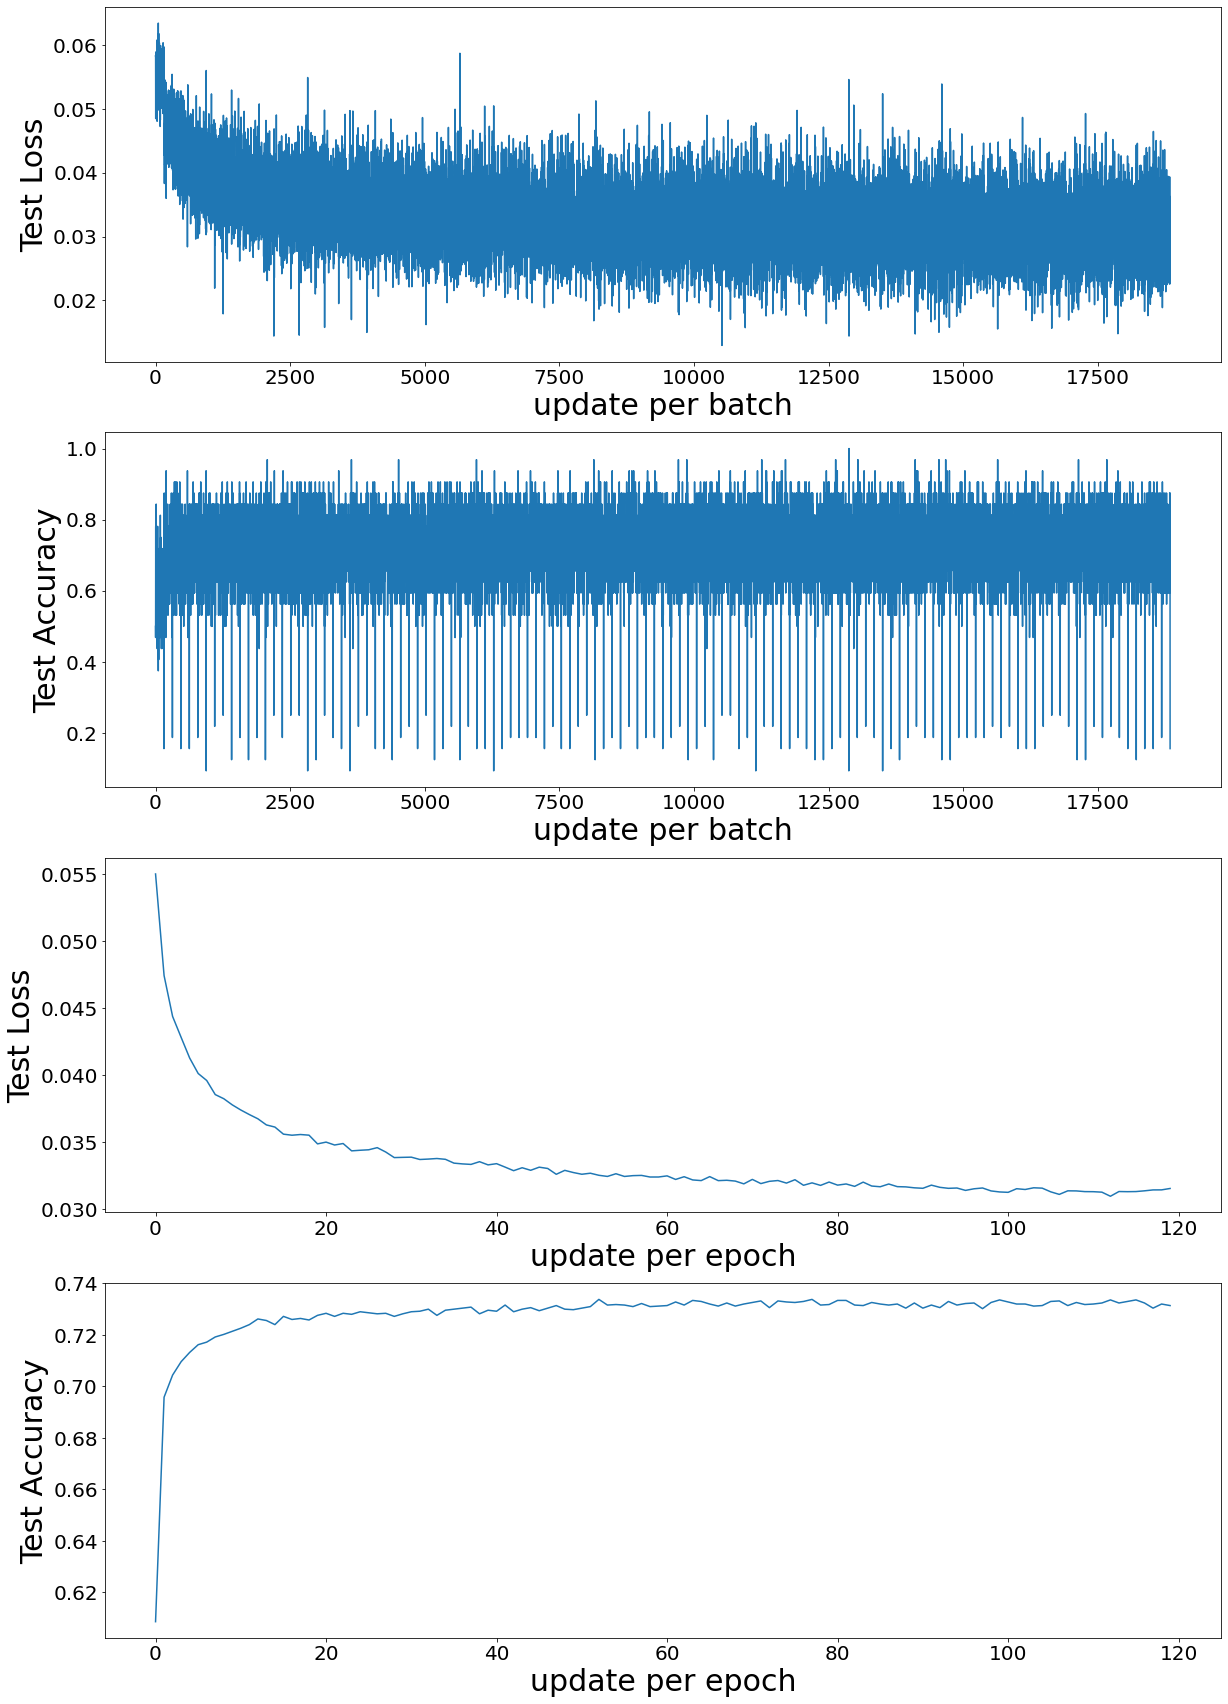

In [8]:
fig1 = plt.figure(figsize=(20,30))

plt.subplot(4,1,1)
plt.plot(test_loss_per_batch)
plt.xlabel('update per batch', fontsize=30)
plt.ylabel('Test Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,2)
plt.plot(test_accuracy_per_batch)
plt.xlabel('update per batch', fontsize=30)
plt.ylabel('Test Accuracy', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,3)
plt.plot(test_loss_per_epoch)
plt.xlabel('update per epoch', fontsize=30)
plt.ylabel('Test Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(4,1,4)
plt.plot(test_accuracy_per_epoch)
plt.xlabel('update per epoch', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Test Accuracy', fontsize=30)


tensor(0.7314)
tensor(0.4223)


Text(0, 0.5, 'Accuracy')

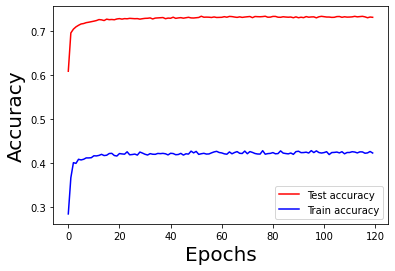

In [13]:
plt.plot(test_accuracy_per_epoch,'-r',label='Test accuracy')
plt.plot(train_accuracy_per_epoch,'-b',label='Train accuracy')
plt.legend(loc="lower right", fontsize='medium')

print(test_accuracy_per_epoch[-1])
print(train_accuracy_per_epoch[-1])

plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

0.03155069850683212
0.04743723606268565


Text(0, 0.5, 'Loss')

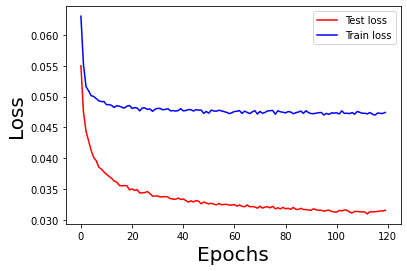

In [12]:
plt.plot(test_loss_per_epoch,'-r',label='Test loss')
plt.plot(train_loss_per_epoch,'-b',label='Train loss')
plt.legend(loc="upper right", fontsize='medium')

print(test_loss_per_epoch[-1])
print(train_loss_per_epoch[-1])

plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)

tensor(0.2686)
tensor(0.5777)


Text(0, 0.5, 'Error')

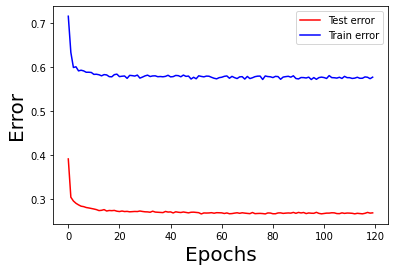

In [14]:
plt.plot(test_error_per_epoch,'-r',label='Test error')
plt.plot(train_error_per_epoch,'-b',label='Train error')
plt.legend(loc="upper right", fontsize='medium')

print(test_error_per_epoch[-1])
print(train_error_per_epoch[-1])

plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Error', fontsize=20)